In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,precision_score,recall_score
from interpret.glassbox import ExplainableBoostingClassifier
import matplotlib.pyplot as plt

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df=pd.read_csv("pd_speech_features.csv")

In [3]:
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [4]:
X=df.drop(columns=['class'])

In [5]:
y=df['class']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
xgb=XGBClassifier()

In [8]:
xgb.fit(X_train,y_train)

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[09:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy:  0.881578947368421
F1 Score:  0.9291338582677166
Precision:  0.8740740740740741
Recall (Sensitivity):  0.9915966386554622


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

Specificity:  0.48484848484848486


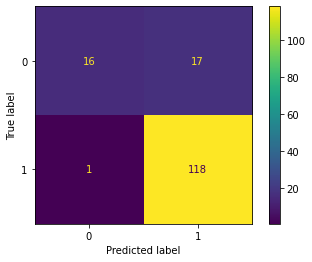

In [9]:
print("Accuracy: ",accuracy_score(y_test,xgb.predict(X_test)))
print("F1 Score: ",f1_score(y_test,xgb.predict(X_test)))
print("Precision: ",precision_score(y_test,xgb.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,xgb.predict(X_test)))


cm=confusion_matrix(y_test,xgb.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [10]:
rfr=RandomForestClassifier()

In [11]:
rfr.fit(X_train,y_train)

RandomForestClassifier()

Accuracy:  0.8421052631578947
F1 Score:  0.90625
Precision:  0.8467153284671532
Recall (Sensitivity):  0.9747899159663865


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Specificity:  0.48484848484848486


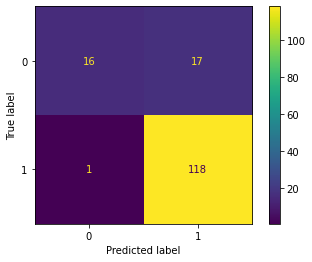

In [12]:
print("Accuracy: ",accuracy_score(y_test,rfr.predict(X_test)))
print("F1 Score: ",f1_score(y_test,rfr.predict(X_test)))
print("Precision: ",precision_score(y_test,rfr.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,rfr.predict(X_test)))


cm=confusion_matrix(y_test,xgb.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


C:\Users\sutha\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy:  0.8355263157894737
F1 Score:  0.9019607843137255
Precision:  0.8455882352941176
Recall (Sensitivity):  0.9663865546218487
Specificity:  0.36363636363636365


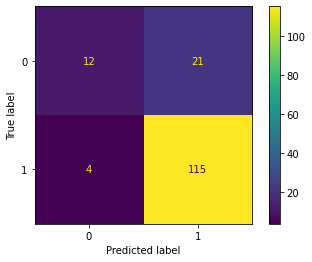

In [13]:
ebm=ExplainableBoostingClassifier()
ebm.fit(X_train,y_train)

print("Accuracy: ",accuracy_score(y_test,ebm.predict(X_test)))
print("F1 Score: ",f1_score(y_test,ebm.predict(X_test)))
print("Precision: ",precision_score(y_test,ebm.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,ebm.predict(X_test)))


cm=confusion_matrix(y_test,ebm.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [27]:
from interpret import show
show(ebm.explain_global())


<!-- http://127.0.0.1:7001/2307332242256/ -->

In [15]:
fic=list(rfr.feature_importances_)

In [16]:
import matplotlib.pyplot as plt

<BarContainer object of 754 artists>

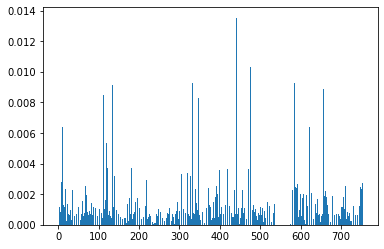

In [17]:
plt.bar([i for i in range(len(df.columns)-1)],fic)

In [18]:
len(fic)==len(df.columns)

False

In [19]:
print('[',end='')
for i in range(len(fic)):
    if fic[i]>=0.0025:
        print(f"'{df.columns[i]}'",end=" ,")
print(']',end='')

['numPeriodsPulses' ,'meanPeriodPulses' ,'stdDevPeriodPulses' ,'locPctJitter' ,'locAbsJitter' ,'rapJitter' ,'ppq5Jitter' ,'locShimmer' ,'f1' ,'GNE_std' ,'IMF_SNR_entropy' ,'mean_MFCC_2nd_coef' ,'mean_MFCC_10th_coef' ,'std_delta_log_energy' ,'std_6th_delta' ,'std_7th_delta' ,'std_8th_delta' ,'std_9th_delta' ,'std_10th_delta' ,'std_delta_delta_log_energy' ,'std_6th_delta_delta' ,'std_7th_delta_delta' ,'std_8th_delta_delta' ,'std_9th_delta_delta' ,'std_12th_delta_delta' ,'det_entropy_log_1_coef' ,'det_TKEO_std_1_coef' ,'app_det_TKEO_mean_8_coef' ,'app_TKEO_std_5_coef' ,'app_LT_TKEO_mean_4_coef' ,'app_LT_TKEO_std_9_coef' ,'tqwt_energy_dec_6' ,'tqwt_energy_dec_7' ,'tqwt_energy_dec_11' ,'tqwt_energy_dec_12' ,'tqwt_energy_dec_13' ,'tqwt_energy_dec_25' ,'tqwt_energy_dec_26' ,'tqwt_energy_dec_27' ,'tqwt_energy_dec_33' ,'tqwt_entropy_shannon_dec_11' ,'tqwt_entropy_shannon_dec_12' ,'tqwt_entropy_shannon_dec_13' ,'tqwt_entropy_shannon_dec_33' ,'tqwt_entropy_shannon_dec_34' ,'tqwt_entropy_shannon_d

In [20]:
important=['id' ,'numPulses' ,'meanPeriodPulses' ,'locAbsJitter' ,'ppq5Jitter' ,'locDbShimmer' ,'apq11Shimmer' ,'meanHarmToNoiseHarmonicity' ,'minIntensity' ,'f1' ,'b1' ,'GQ_std_cycle_open' ,'mean_MFCC_2nd_coef' ,'mean_MFCC_8th_coef' ,'std_Log_energy' ,'std_delta_log_energy' ,'std_2nd_delta' ,'std_5th_delta' ,'std_6th_delta' ,'std_7th_delta' ,'std_8th_delta' ,'std_delta_delta_log_energy' ,'std_6th_delta_delta' ,'std_7th_delta_delta' ,'std_8th_delta_delta' ,'std_9th_delta_delta' ,'std_12th_delta_delta' ,'det_TKEO_mean_1_coef' ,'app_entropy_shannon_3_coef' ,'app_entropy_log_6_coef' ,'app_det_TKEO_mean_3_coef' ,'app_det_TKEO_mean_8_coef' ,'app_TKEO_std_5_coef' ,'det_LT_entropy_shannon_1_coef' ,'det_LT_entropy_shannon_3_coef' ,'det_LT_TKEO_std_4_coef' ,'app_LT_entropy_shannon_10_coef' ,'app_LT_entropy_log_9_coef' ,'app_LT_TKEO_mean_9_coef' ,'app_LT_TKEO_std_8_coef' ,'tqwt_energy_dec_6' ,'tqwt_energy_dec_11' ,'tqwt_energy_dec_12' ,'tqwt_energy_dec_19' ,'tqwt_energy_dec_26' ,'tqwt_energy_dec_27' ,'tqwt_energy_dec_34' ,'tqwt_entropy_shannon_dec_7' ,'tqwt_entropy_shannon_dec_8' ,'tqwt_entropy_shannon_dec_11' ,'tqwt_entropy_shannon_dec_12' ,'tqwt_entropy_shannon_dec_35' ,'tqwt_entropy_shannon_dec_36' ,'tqwt_entropy_log_dec_11' ,'tqwt_entropy_log_dec_12' ,'tqwt_entropy_log_dec_26' ,'tqwt_entropy_log_dec_27' ,'tqwt_entropy_log_dec_29' ,'tqwt_entropy_log_dec_33' ,'tqwt_entropy_log_dec_35' ,'tqwt_TKEO_mean_dec_6' ,'tqwt_TKEO_mean_dec_11' ,'tqwt_TKEO_mean_dec_12' ,'tqwt_TKEO_mean_dec_17' ,'tqwt_TKEO_mean_dec_18' ,'tqwt_TKEO_mean_dec_26' ,'tqwt_TKEO_mean_dec_32' ,'tqwt_TKEO_mean_dec_34' ,'tqwt_TKEO_mean_dec_35' ,'tqwt_TKEO_mean_dec_36' ,'tqwt_TKEO_std_dec_12' ,'tqwt_TKEO_std_dec_13' ,'tqwt_TKEO_std_dec_14' ,'tqwt_stdValue_dec_7' ,'tqwt_stdValue_dec_11' ,'tqwt_stdValue_dec_12' ,'tqwt_stdValue_dec_13' ,'tqwt_stdValue_dec_34' ,'tqwt_stdValue_dec_35' ,'tqwt_minValue_dec_7' ,'tqwt_minValue_dec_12' ,'tqwt_minValue_dec_18' ,'tqwt_maxValue_dec_12' ,'tqwt_maxValue_dec_13' ,'tqwt_kurtosisValue_dec_17' ,'tqwt_kurtosisValue_dec_20' ,'tqwt_kurtosisValue_dec_34']

In [21]:
preprocessed=df.drop(columns=important)

In [22]:
preprocessed

,gender,PPE,DFA,RPDE,numPeriodsPulses,stdDevPeriodPulses,locPctJitter,rapJitter,ddpJitter,locShimmer,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,239,0.000087,0.00218,0.00067,0.00200,0.05883,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,233,0.000073,0.00195,0.00052,0.00157,0.05516,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,231,0.000060,0.00176,0.00057,0.00171,0.09902,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,177,0.000183,0.00419,0.00149,0.00446,0.05451,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,235,0.002669,0.00535,0.00166,0.00499,0.05610,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,416,0.000052,0.00064,0.00008,0.00024,0.01947,...,3.4394,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,413,0.000220,0.00143,0.00016,0.00047,0.04291,...,19.6733,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,380,0.000103,0.00076,0.00011,0.00034,0.02978,...,137.3126,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,339,0.000055,0.00092,0.00017,0.00052,0.03552,...,5.4425,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.8332,3.7131,0


In [23]:
X=preprocessed.drop(columns=['class'])
y=preprocessed['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [24]:
X_test

,gender,PPE,DFA,RPDE,numPeriodsPulses,stdDevPeriodPulses,locPctJitter,rapJitter,ddpJitter,locShimmer,...,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
594,1,0.75638,0.70234,0.61218,282,0.000032,0.00126,0.00031,0.00094,0.09002,...,2.4640,2.4175,2.5011,2.9637,2.5929,2.8043,1.8700,1.6933,3.7304,11.2957
118,1,0.84137,0.73558,0.41782,233,0.000081,0.00177,0.00051,0.00152,0.06859,...,1.5098,1.5508,43.0289,37.1365,36.2467,32.6067,45.4335,48.1864,39.5734,87.5750
290,1,0.79242,0.60957,0.61838,168,0.000082,0.00196,0.00055,0.00164,0.07584,...,1.6194,1.7303,1.5912,1.5850,1.5829,2.9562,2.8778,3.0847,5.9271,2.9965
203,0,0.42874,0.62713,0.53534,306,0.001986,0.00205,0.00042,0.00126,0.03330,...,1.8354,9.3336,73.3493,31.8048,19.7200,7.8174,3.8287,3.0855,3.9258,3.7013
314,1,0.22676,0.73030,0.69055,274,0.001660,0.00719,0.00193,0.00578,0.05408,...,1.7928,4.4671,3.1345,2.8672,2.6352,2.9356,2.3291,2.5576,3.1090,3.1932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,0.76819,0.77879,0.29519,440,0.000061,0.00063,0.00008,0.00023,0.04034,...,143.2389,65.9142,13.2958,3.1072,3.0053,2.7469,6.4713,7.7527,9.1483,4.8468
86,0,0.79674,0.76427,0.36046,446,0.000059,0.00106,0.00016,0.00049,0.07820,...,1.6358,5.9988,107.0928,74.4756,16.1439,4.0035,7.2907,40.8973,26.1875,7.4107
157,1,0.80758,0.61078,0.55249,319,0.000070,0.00152,0.00020,0.00060,0.02996,...,1.6169,1.9593,19.5283,13.6597,14.0735,12.2956,9.4718,8.1846,24.2660,68.4442
535,0,0.62776,0.60266,0.55819,540,0.001615,0.00588,0.00173,0.00519,0.06340,...,36.6188,23.2194,17.4402,18.6066,25.2220,7.9237,3.4377,5.2738,15.0920,13.4653


Accuracy:  0.875
F1 Score:  0.9147982062780269
Precision:  0.8571428571428571
Recall (Sensistivity):  0.9807692307692307
Specificity:  0.6458333333333334
Sensitivity:  0.9807692307692307


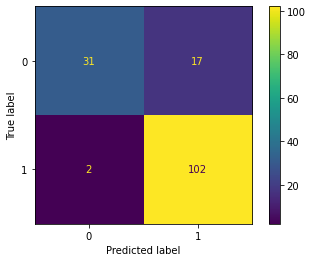

In [25]:
rfr=RandomForestClassifier()
rfr.fit(X_train,y_train)

print("Accuracy: ",accuracy_score(y_test,rfr.predict(X_test)))
print("F1 Score: ",f1_score(y_test,rfr.predict(X_test)))
print("Precision: ",precision_score(y_test,rfr.predict(X_test)))
print("Recall (Sensistivity): ",recall_score(y_test,rfr.predict(X_test)))


cm=confusion_matrix(y_test,rfr.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
print("Sensitivity: ",tp/(tp+fn))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[09:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.8355263157894737
F1 Score:  0.8888888888888888
Precision:  0.8264462809917356
Recall (Sensitivity):  0.9615384615384616


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

Specificity:  0.5625


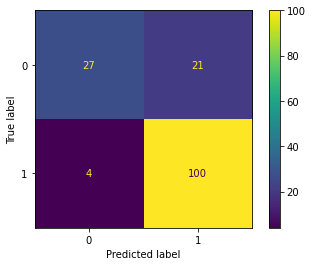

In [26]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print("Accuracy: ",accuracy_score(y_test,xgb.predict(X_test)))
print("F1 Score: ",f1_score(y_test,xgb.predict(X_test)))
print("Precision: ",precision_score(y_test,xgb.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,xgb.predict(X_test)))


cm=confusion_matrix(y_test,xgb.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


Accuracy:  0.8289473684210527
F1 Score:  0.8869565217391304
Precision:  0.8095238095238095
Recall (Sensitivity):  0.9807692307692307
Specificity:  0.5


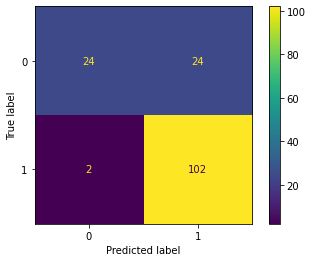

In [28]:
ebm=ExplainableBoostingClassifier()
ebm.fit(X_train,y_train)

print("Accuracy: ",accuracy_score(y_test,ebm.predict(X_test)))
print("F1 Score: ",f1_score(y_test,ebm.predict(X_test)))
print("Precision: ",precision_score(y_test,ebm.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,ebm.predict(X_test)))


cm=confusion_matrix(y_test,ebm.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [30]:
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/2307883441696/ -->